In [1]:
import glob
import os

import matplotlib.pyplot as plt

from Regression import plot_slope_data, RegressionU1SPV

# U 1hPa anomalies regressed onto SPV index

**File read in**

In [2]:
basepath_ua1 = '/home/users/pyb18/CMIP6/zonal/ua1/'
basename_ua1 = 'ua1_Amon_{}_historical_{}_{}'

basepath_ua10 = '/home/users/pyb18/CMIP6/zonal/ua10/'
basename_ua10 = 'ua10_Amon_{}_historical_{}_{}'

basepath_epflux = '/home/users/tabu/eunpa_lim_project/EP_FLUX_DATA/'

pattern = basepath_ua1 + basename_ua1.format('*','*','*')
files = glob.glob(pattern)

model_name_list = []
version_name_list = []
grid_name_list = []

# Find all files that match the above pattern and save the model names, the versions and the grid it was gridded to
for file in files:
    filename = os.path.basename(file).split("/")[-1]
    split_filename = os.path.basename(filename).split("_")
    model_name, version_name, grid_name = split_filename[2], split_filename[-2], split_filename[-1]
    model_name_list.append(model_name)
    version_name_list.append(version_name)
    grid_name_list.append(grid_name)

**Plot all modles individually and together in one big plot**

/tmp/ipykernel_524/2124428428.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax  = plt.subplots(1,3, figsize = (18,3))


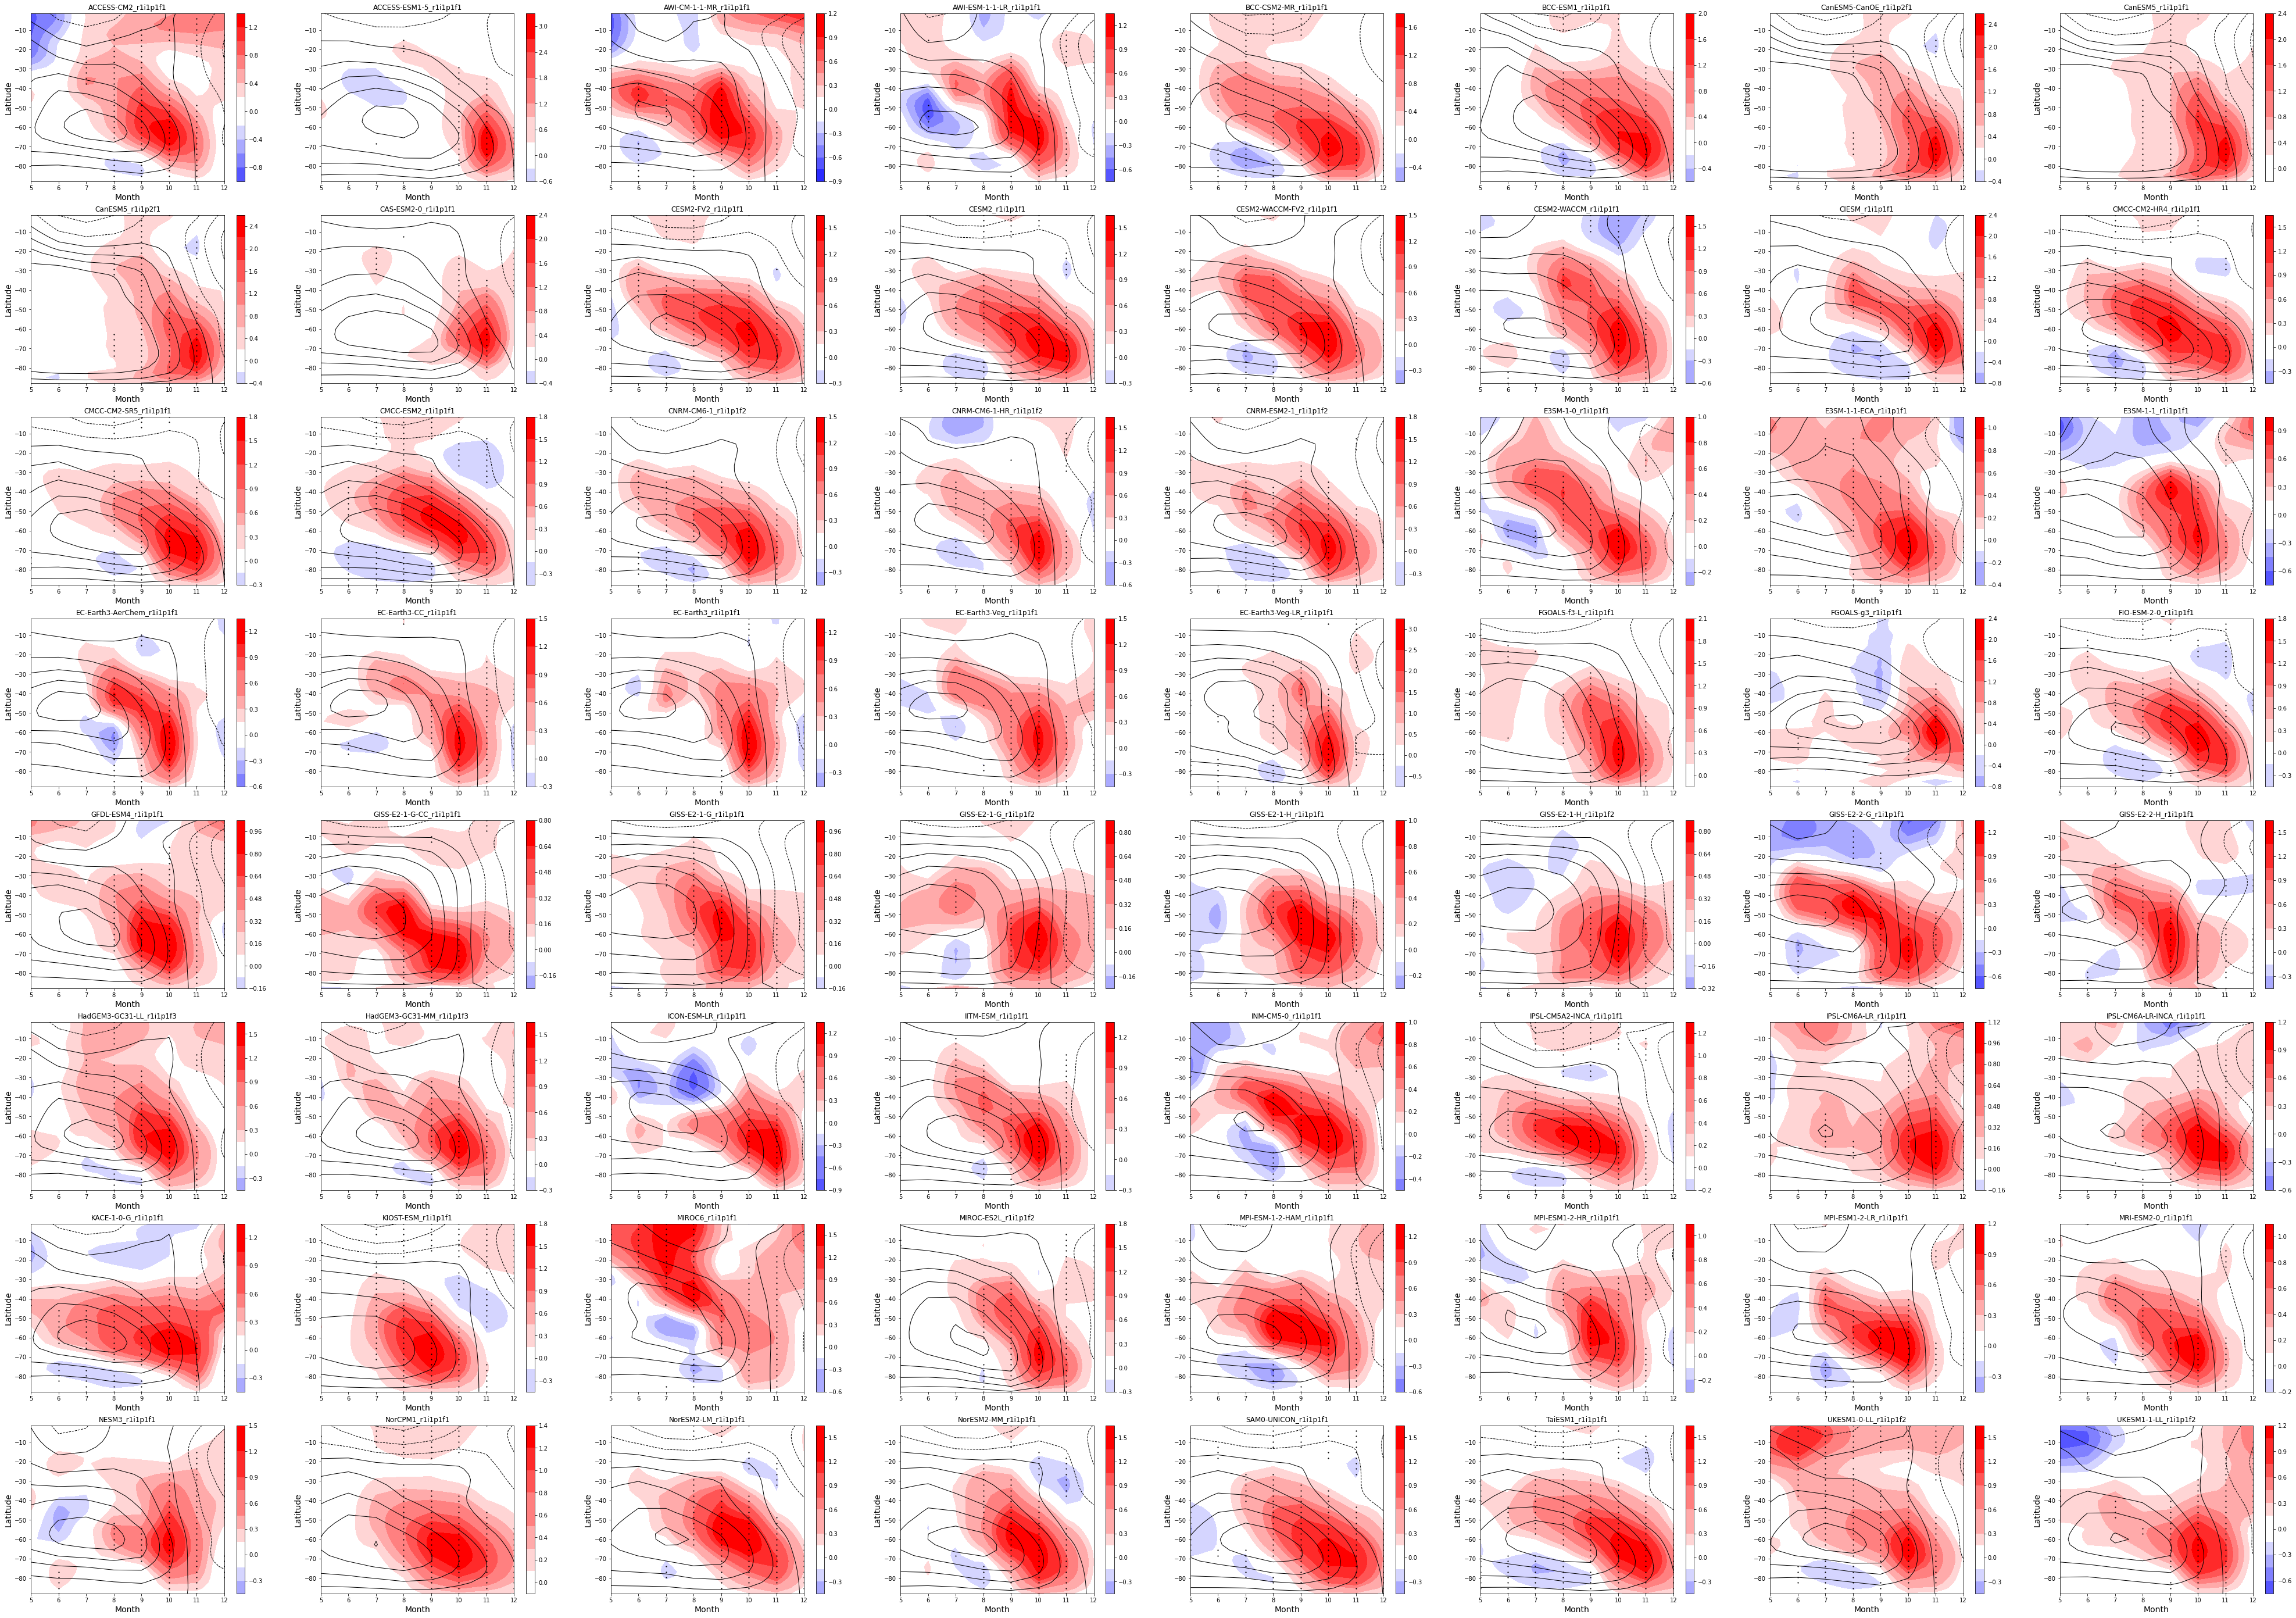

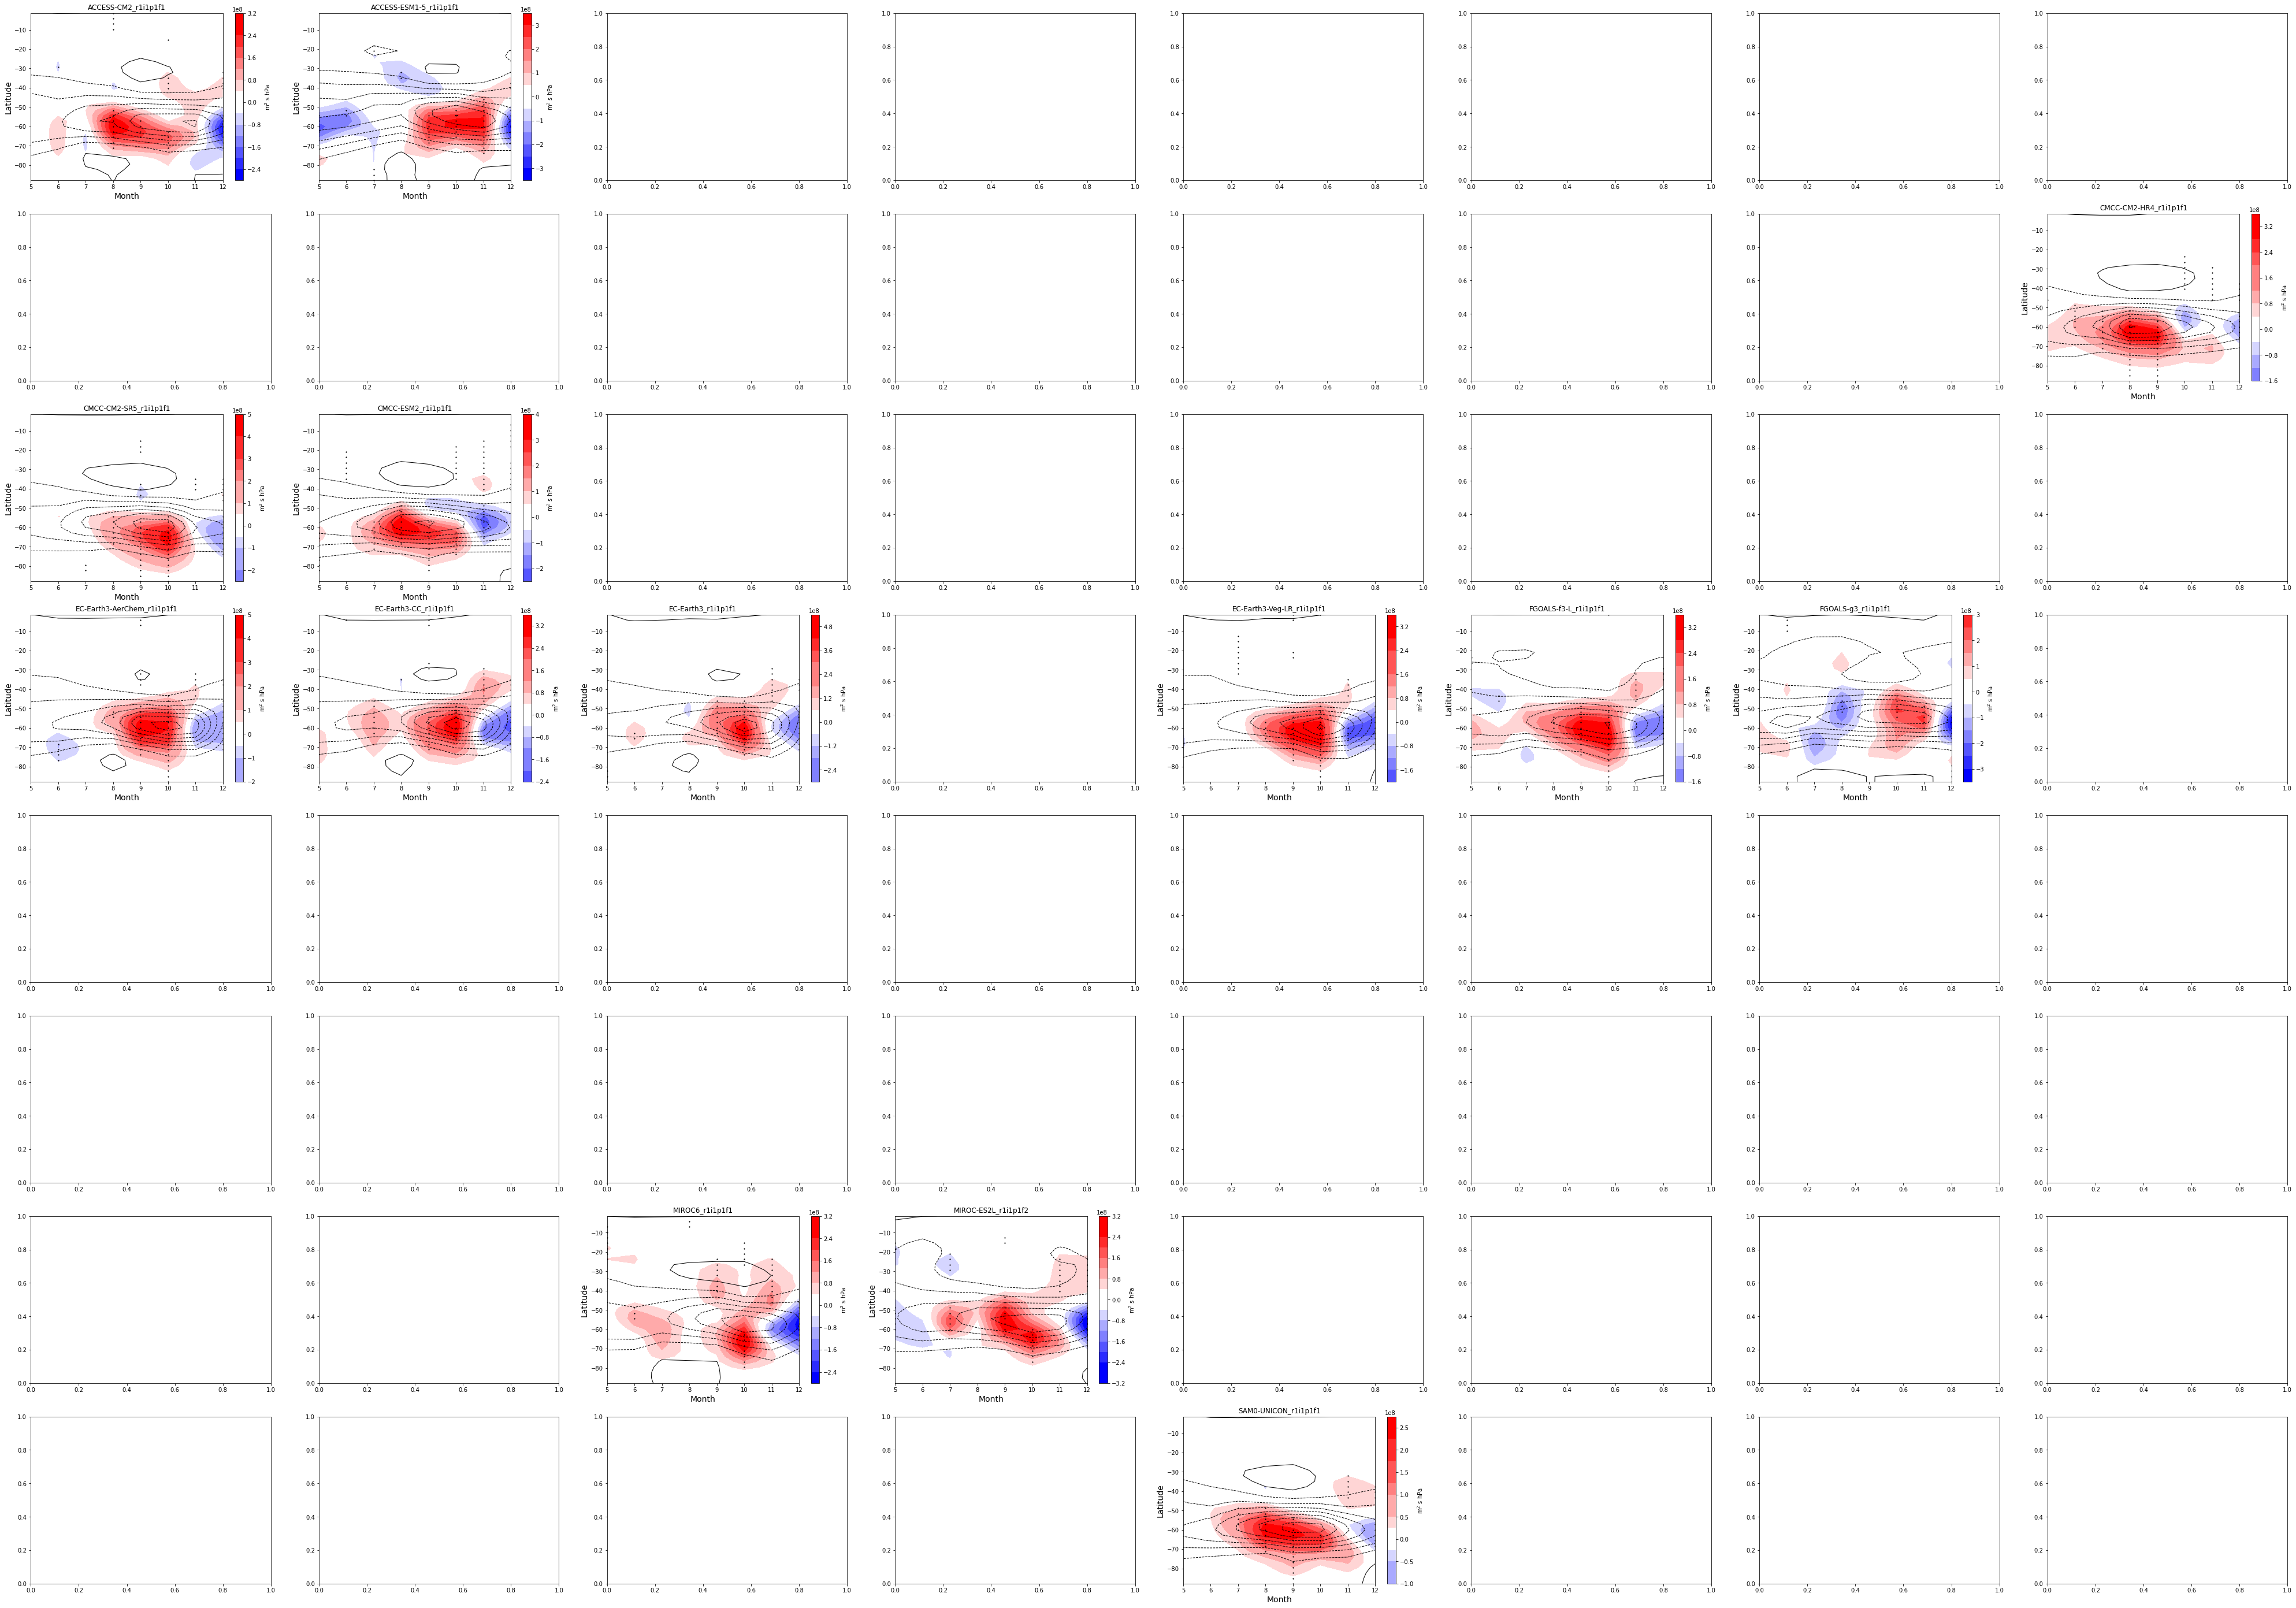

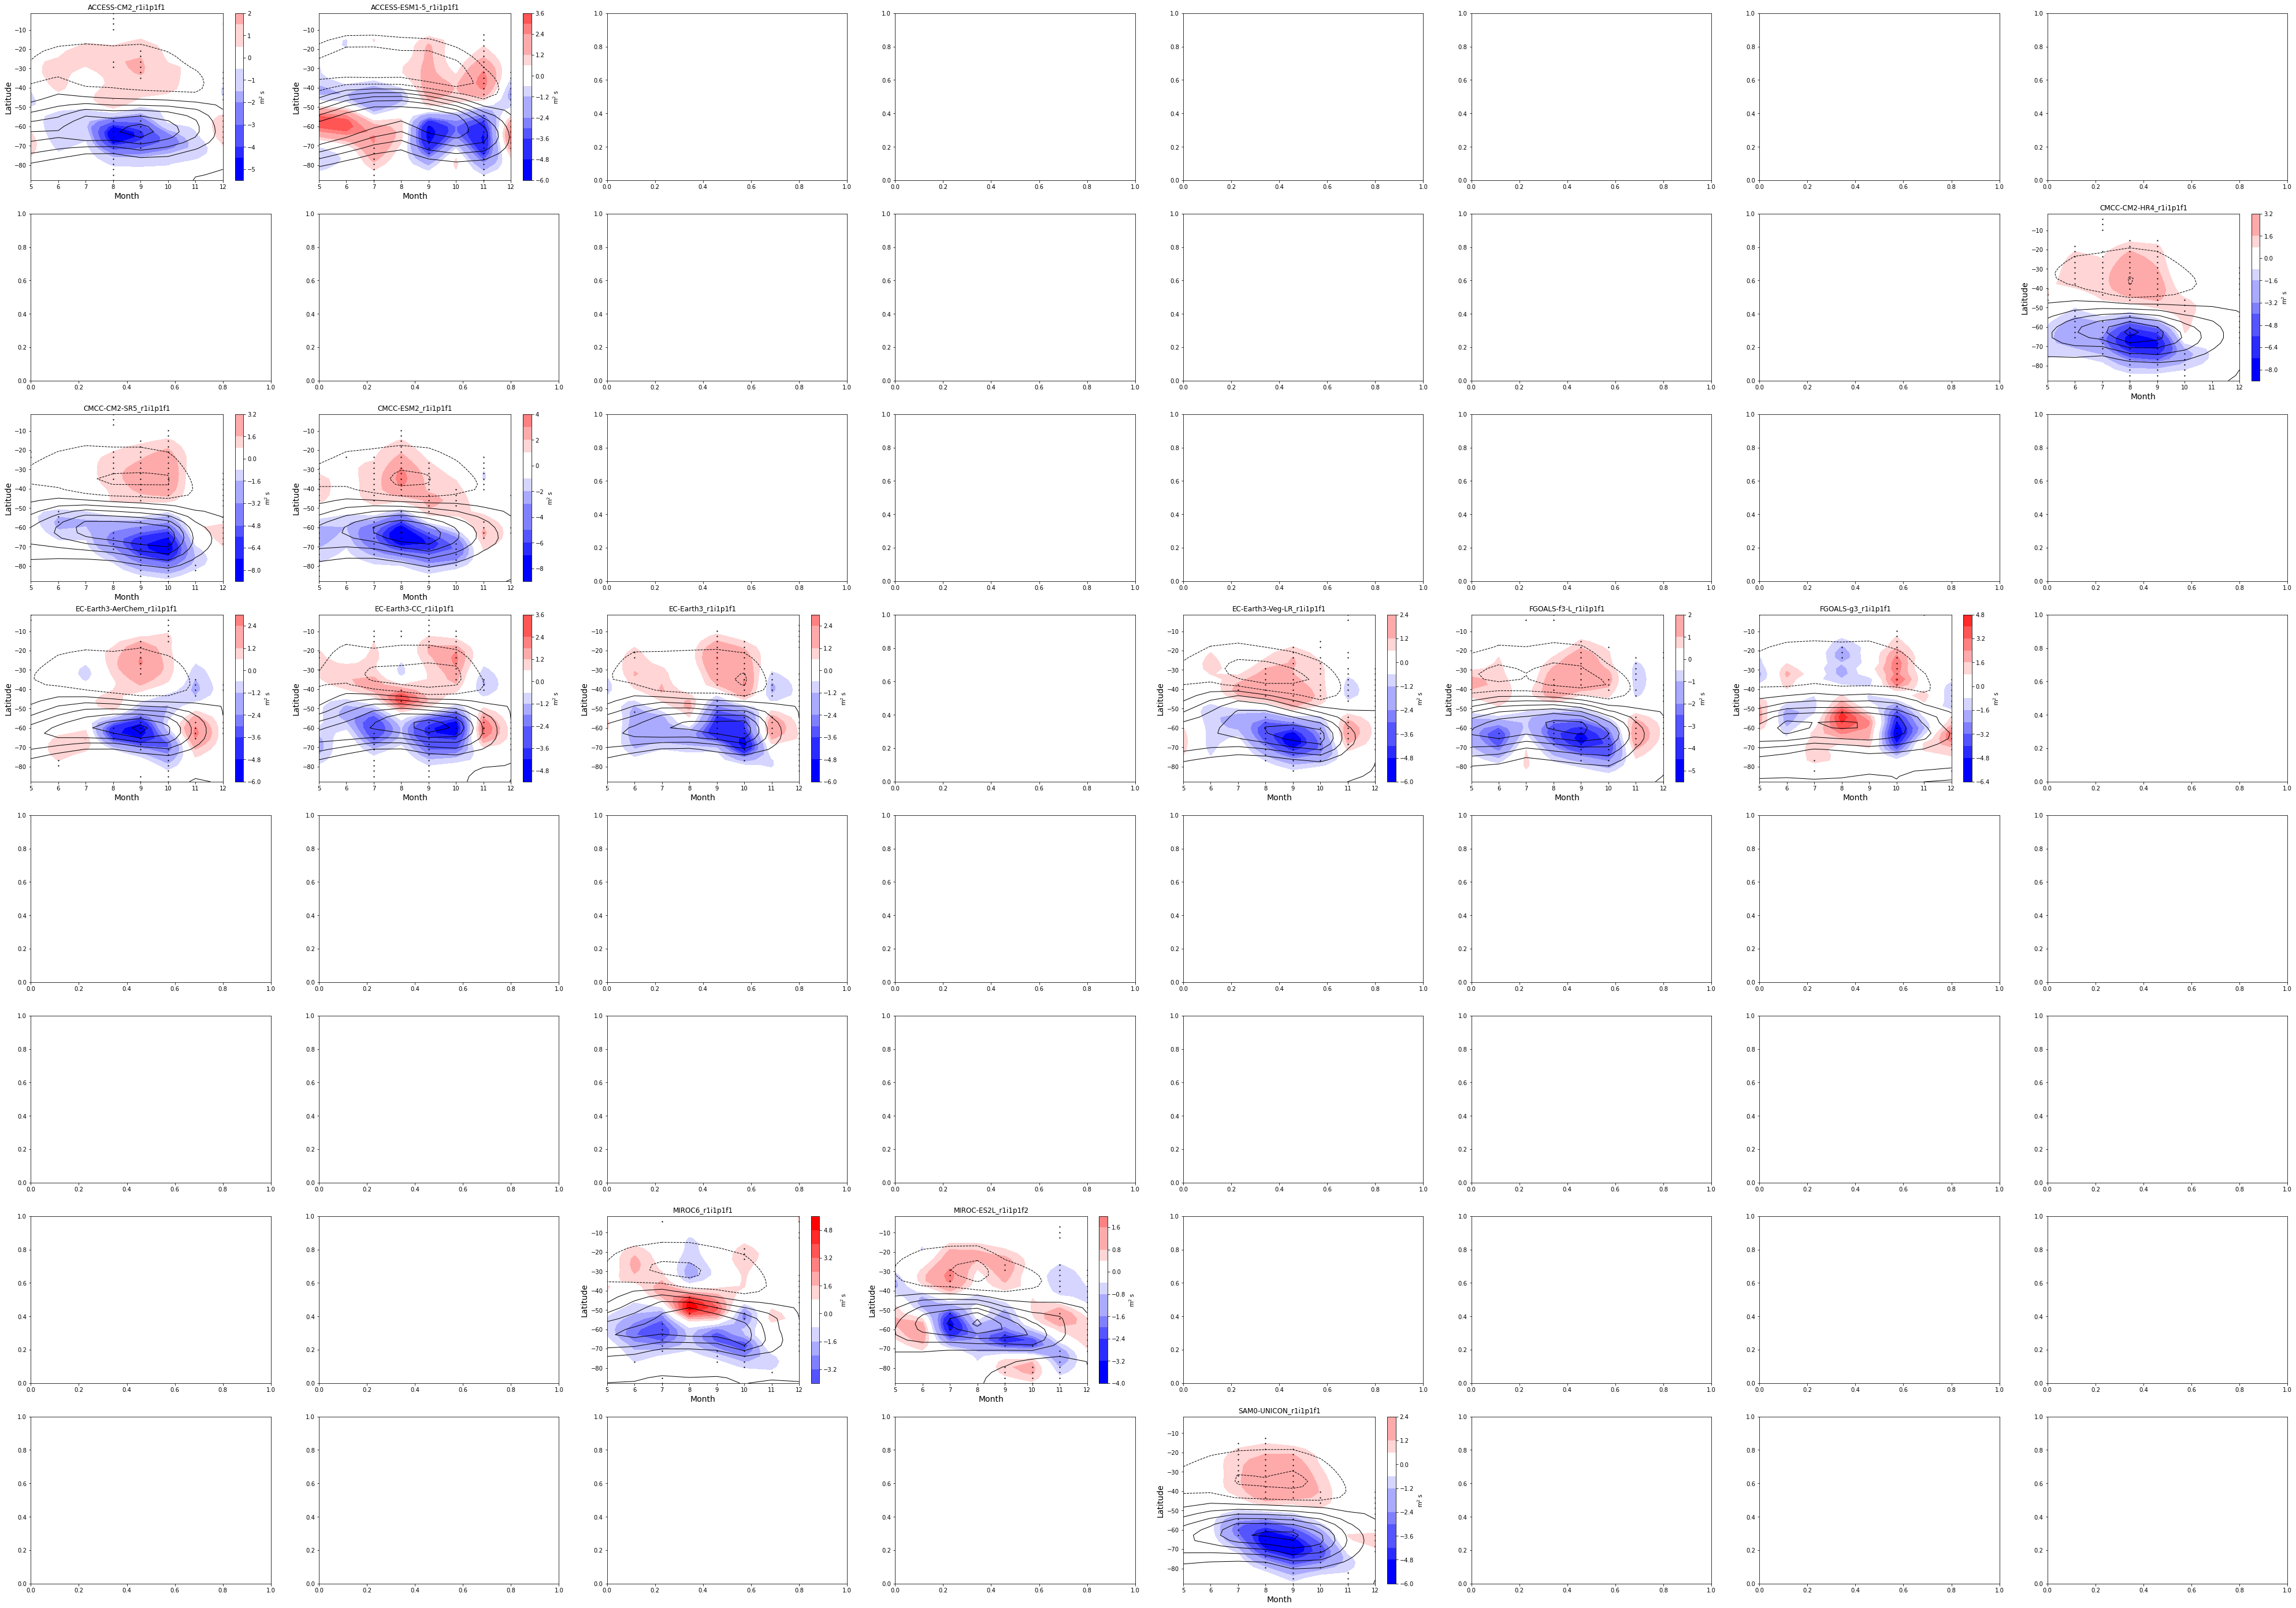

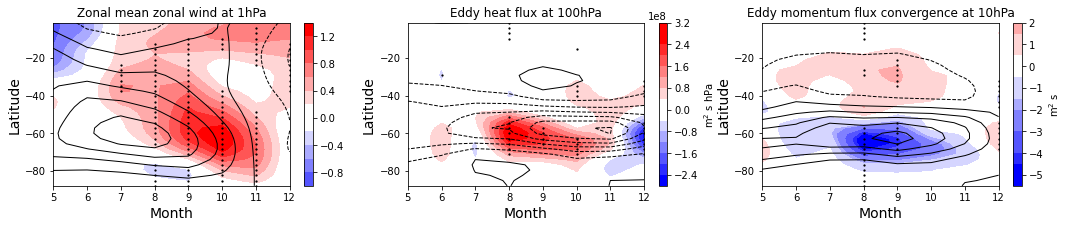

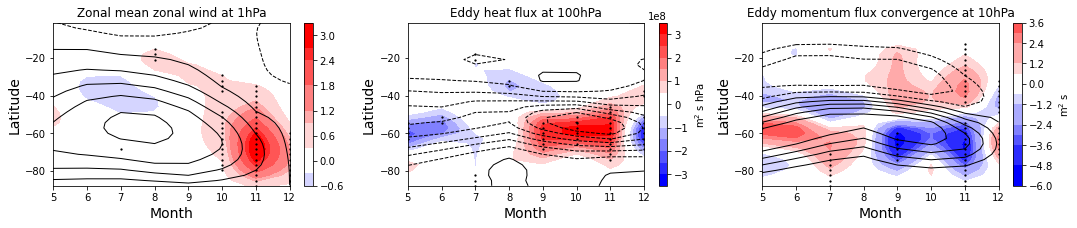

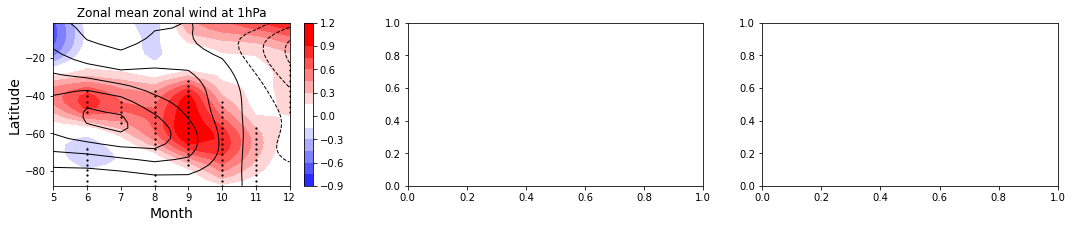

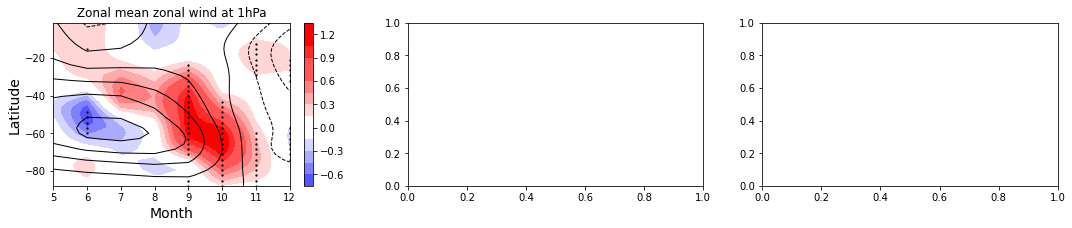

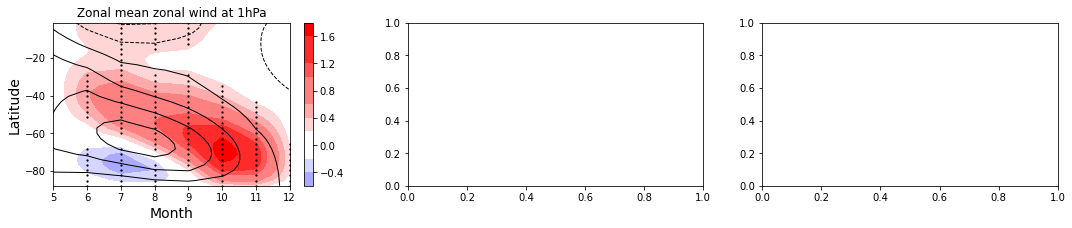

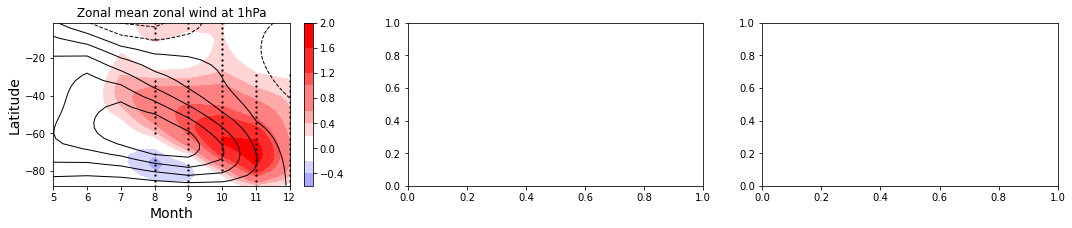

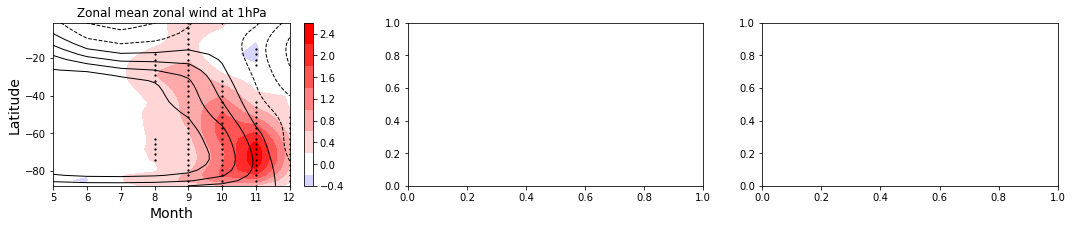

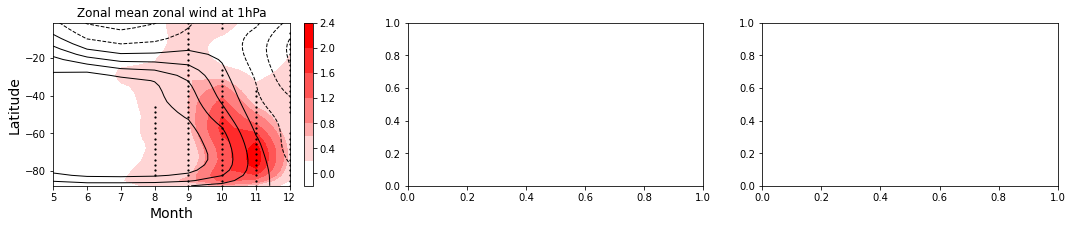

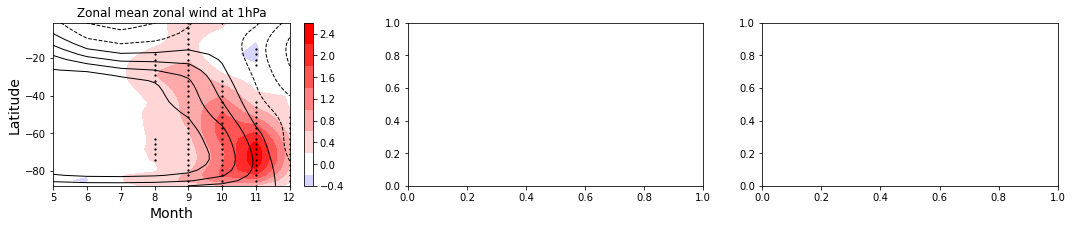

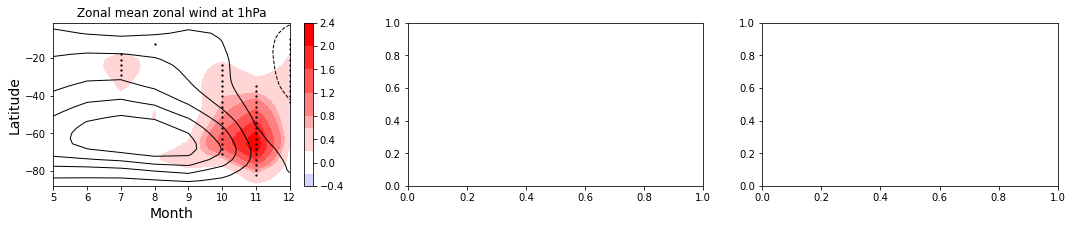

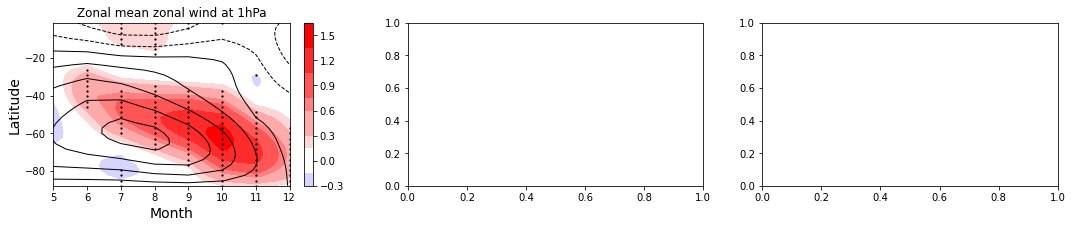

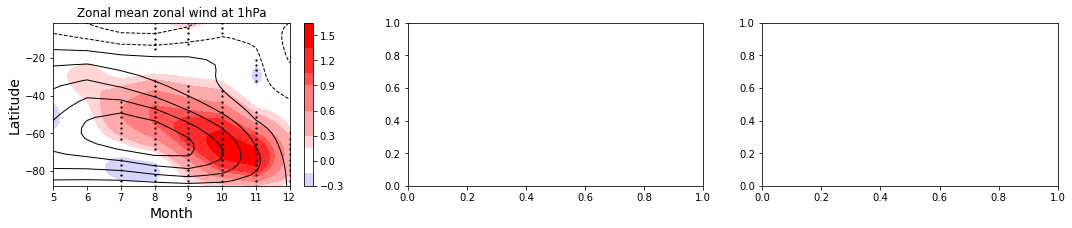

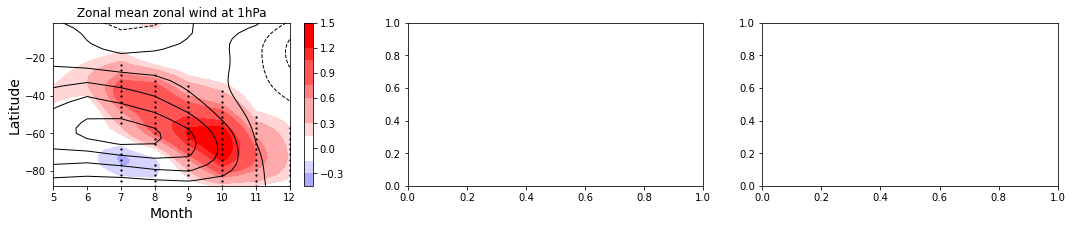

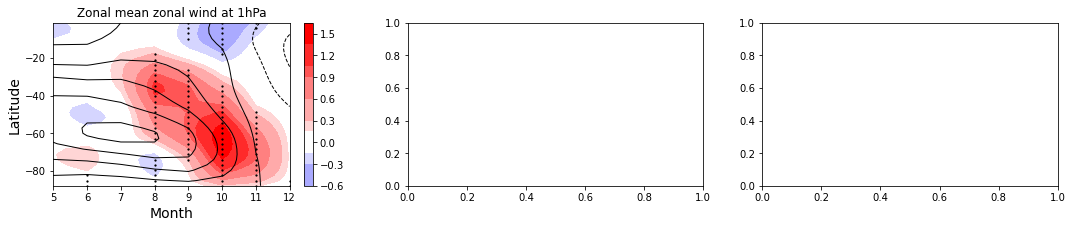

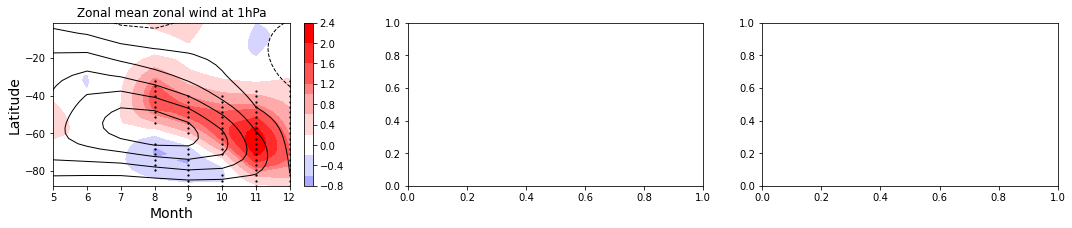

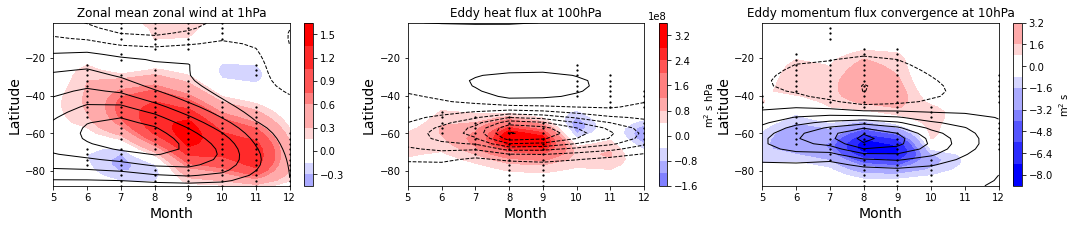

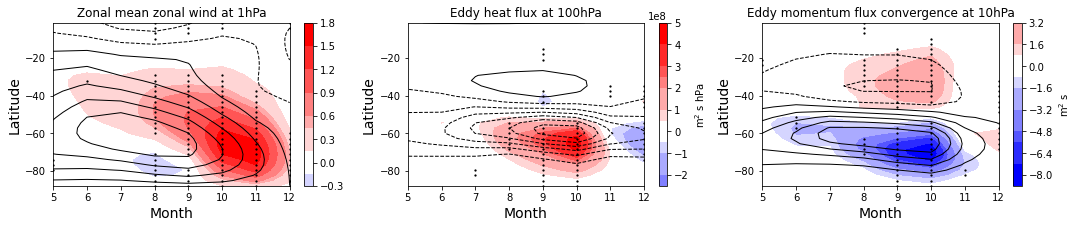

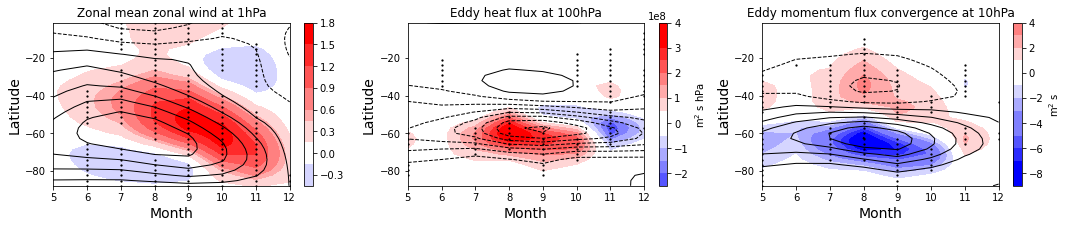

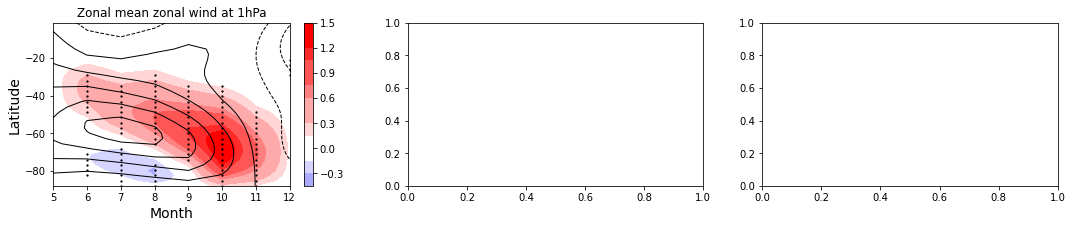

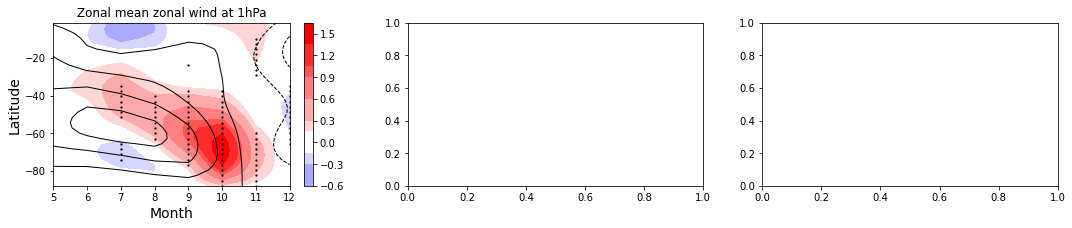

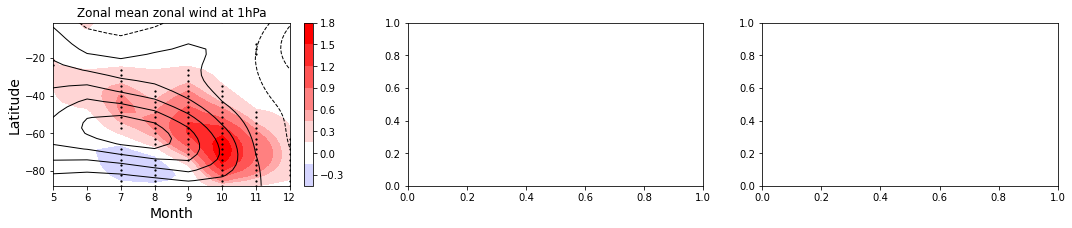

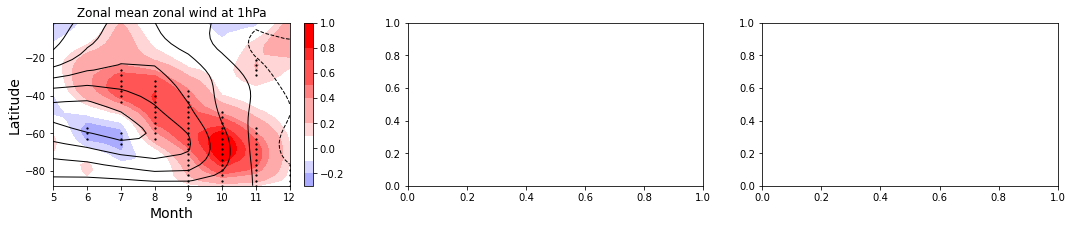

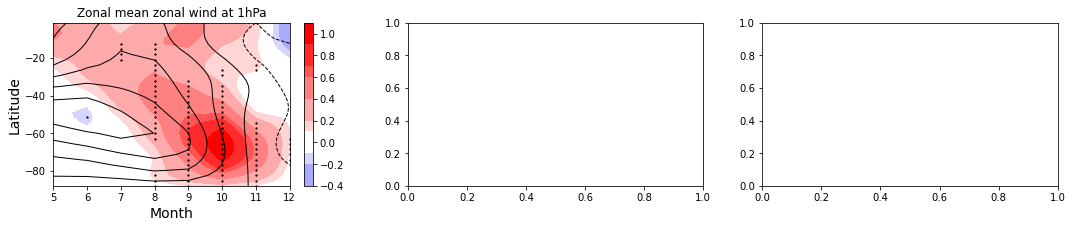

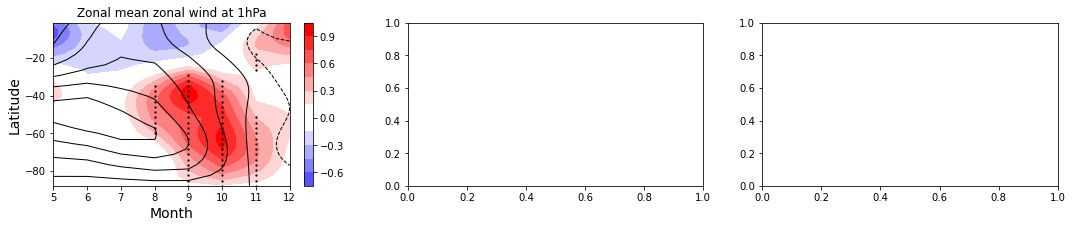

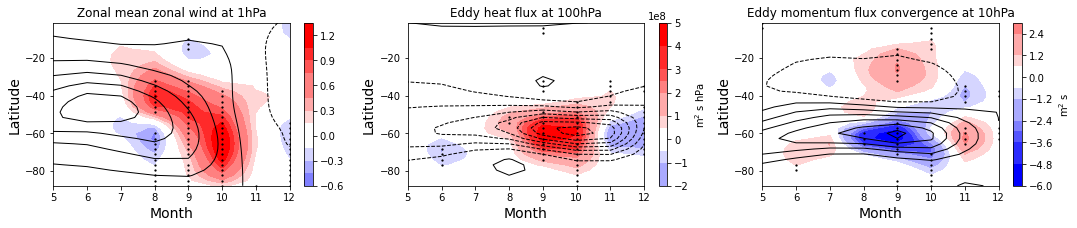

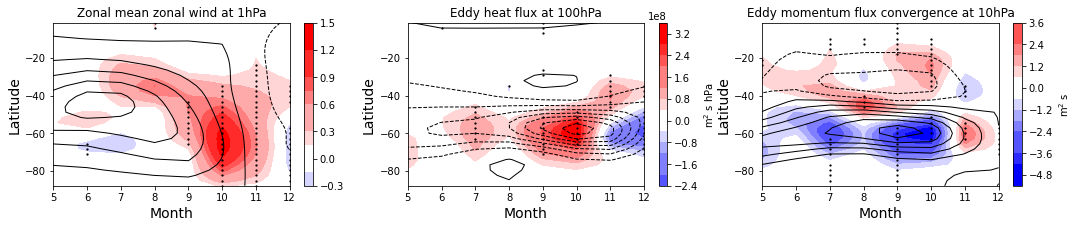

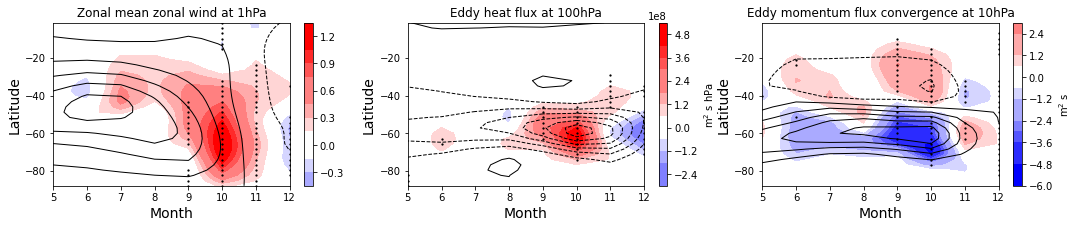

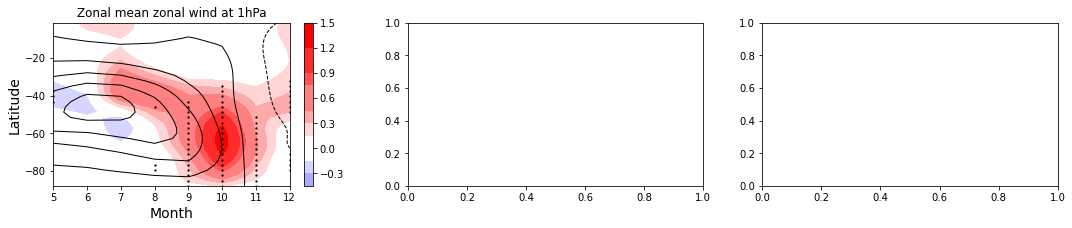

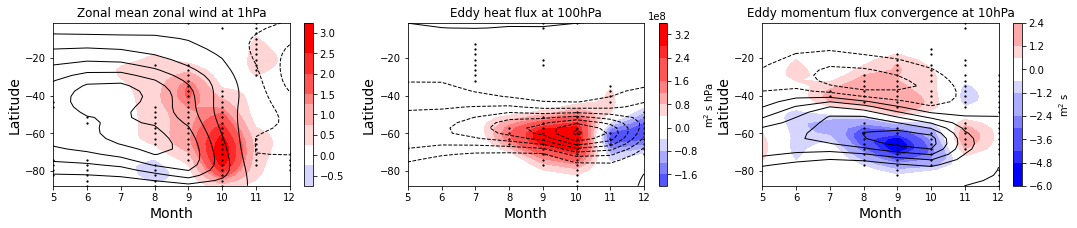

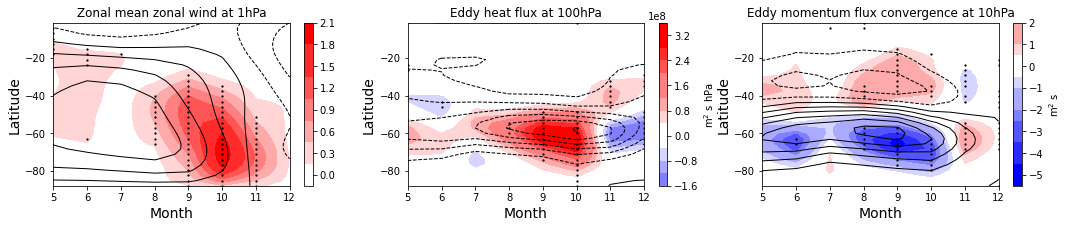

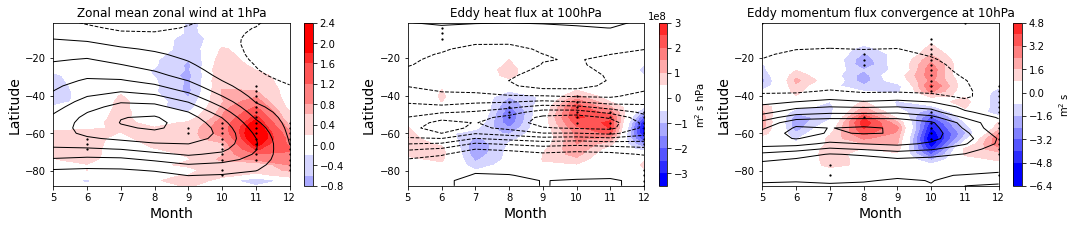

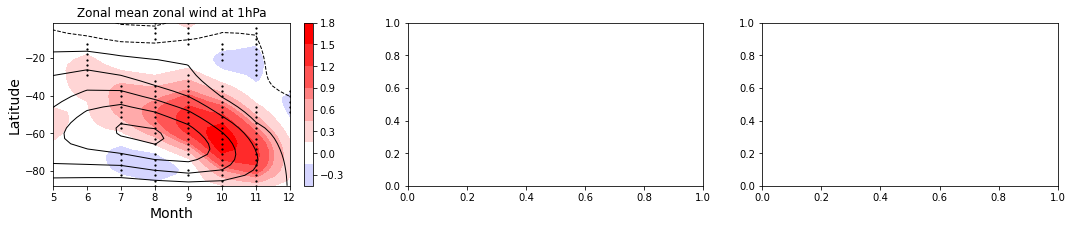

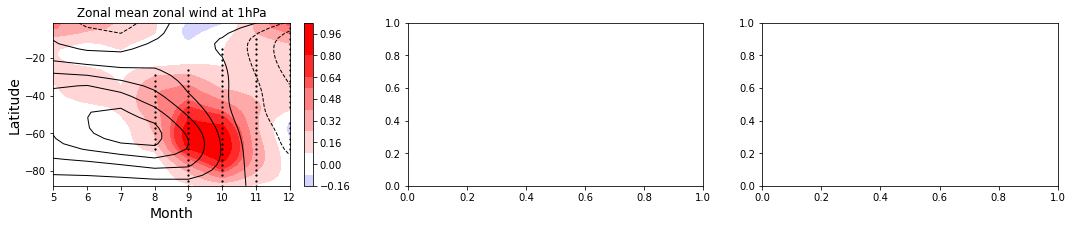

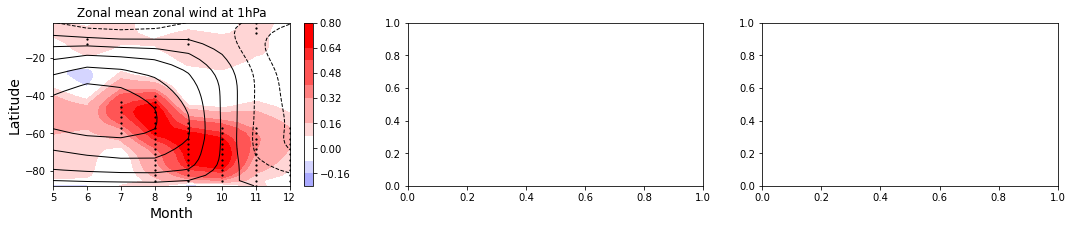

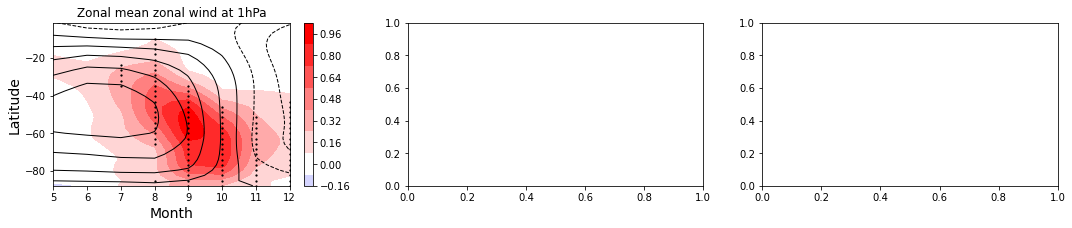

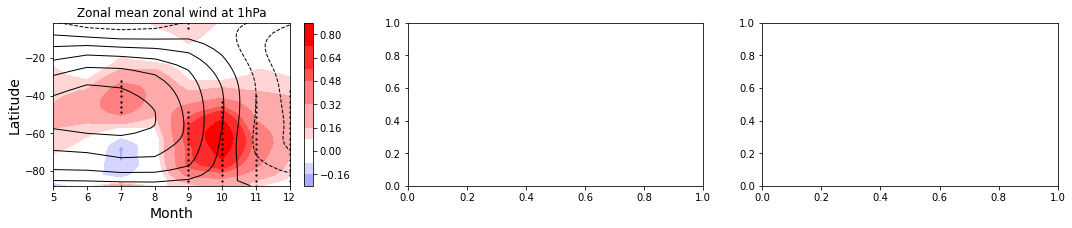

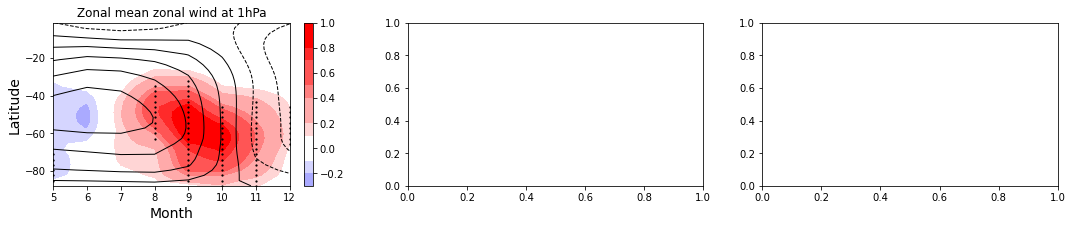

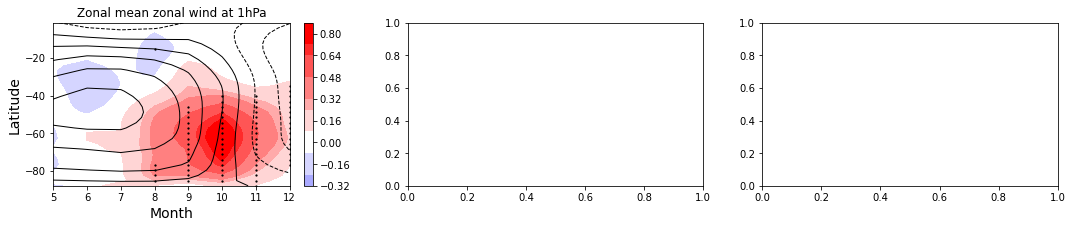

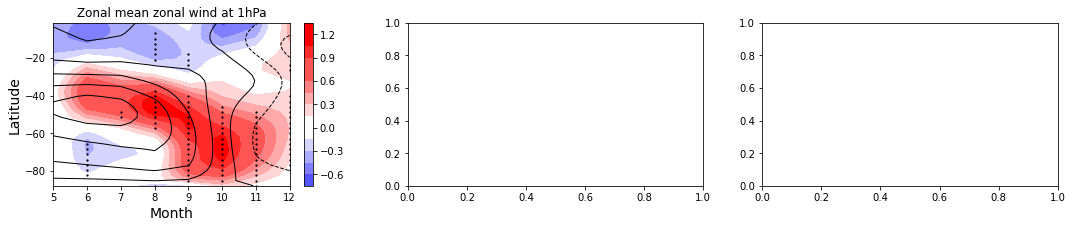

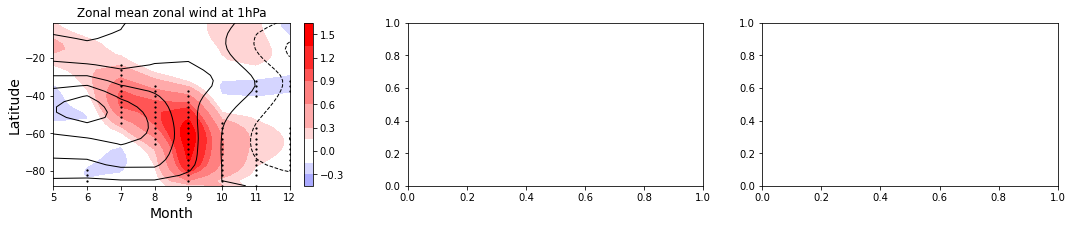

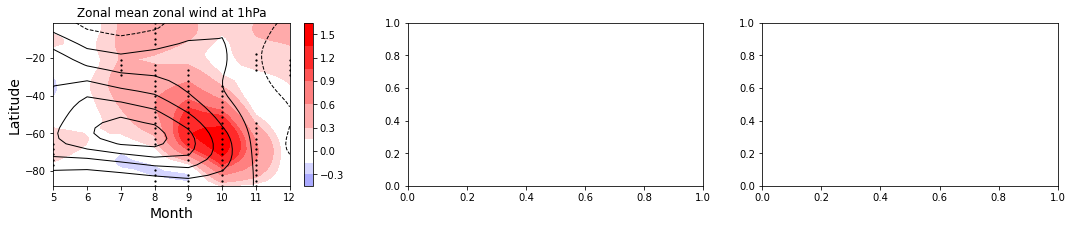

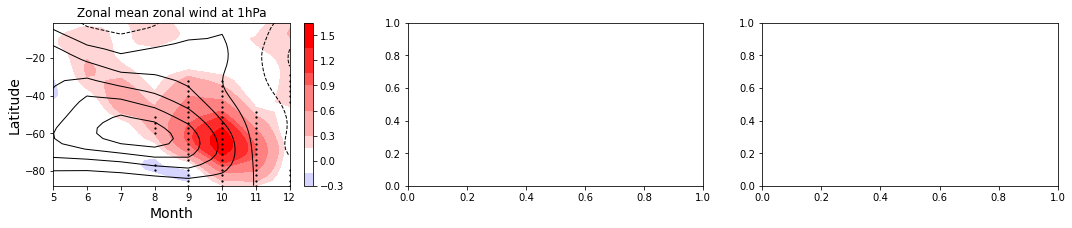

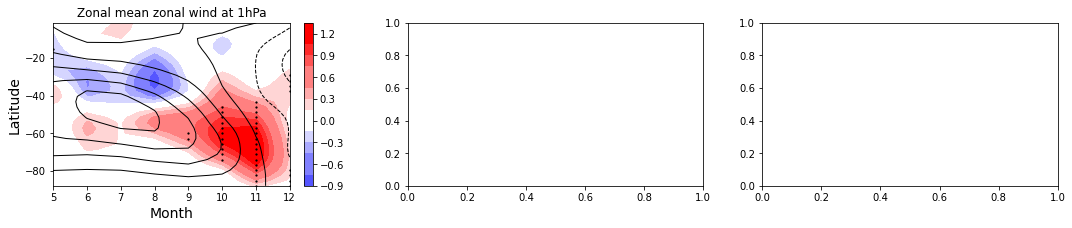

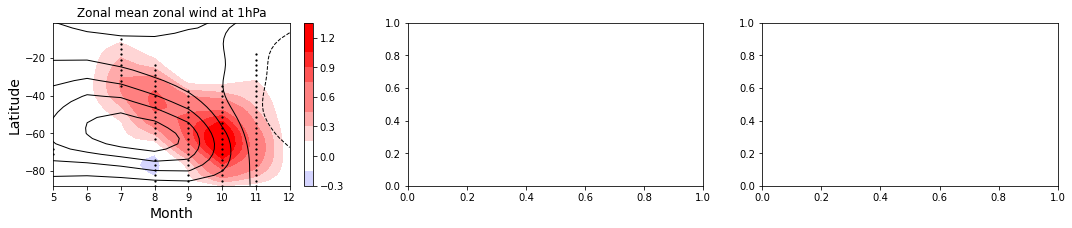

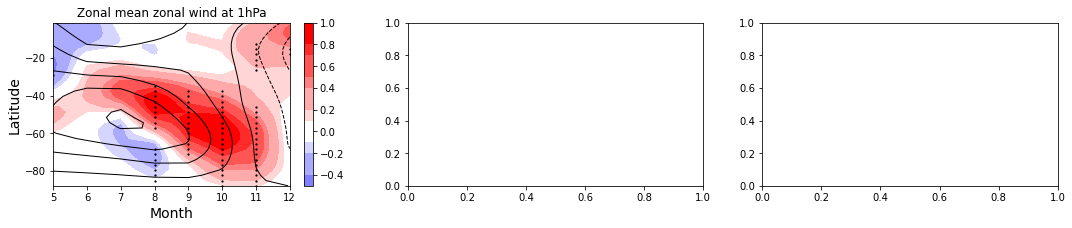

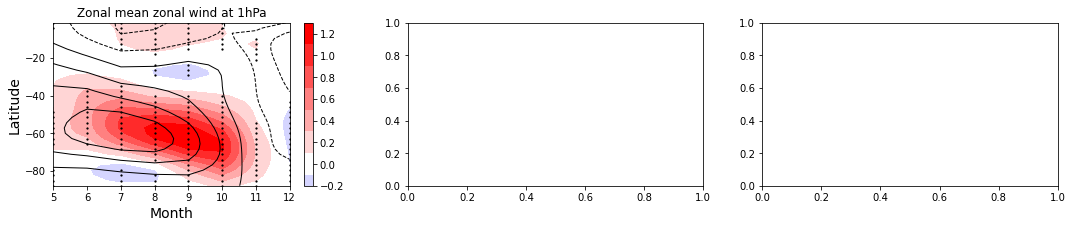

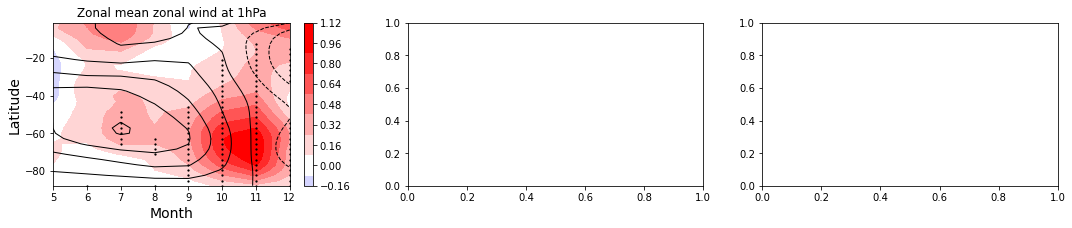

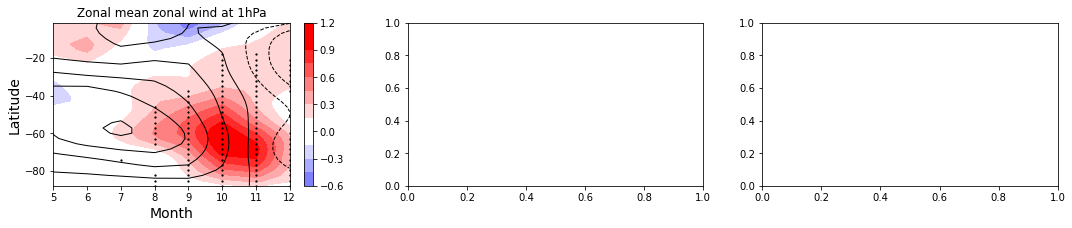

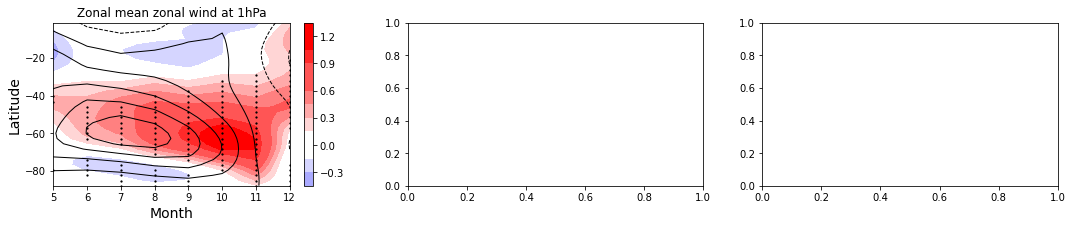

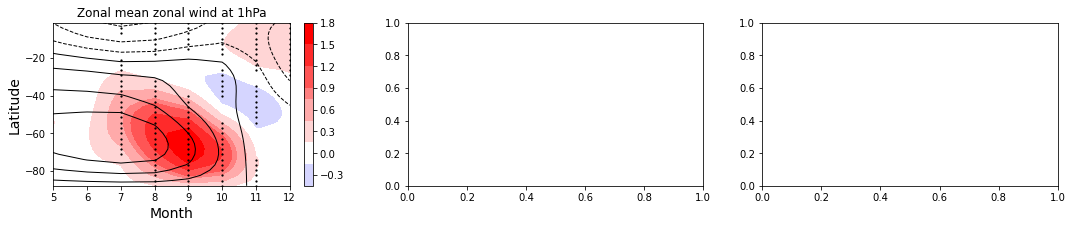

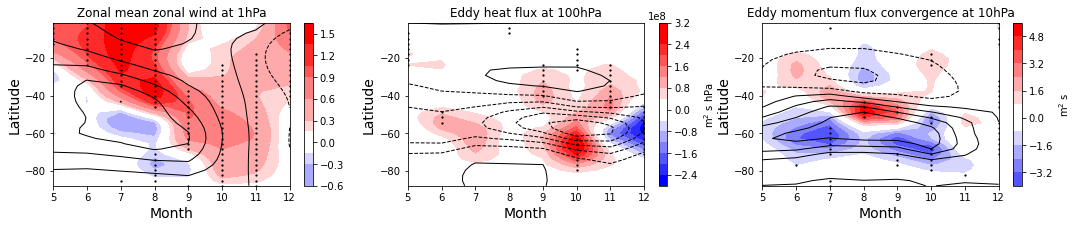

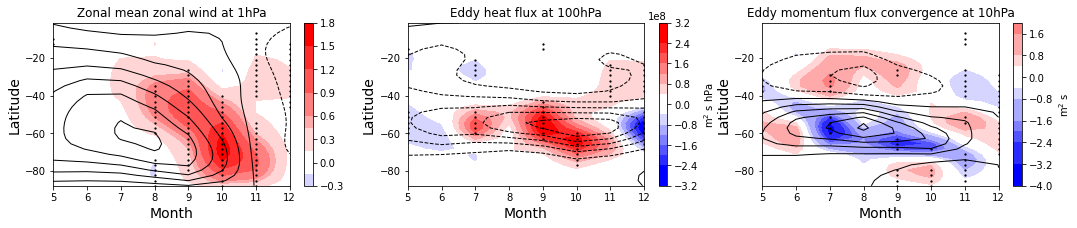

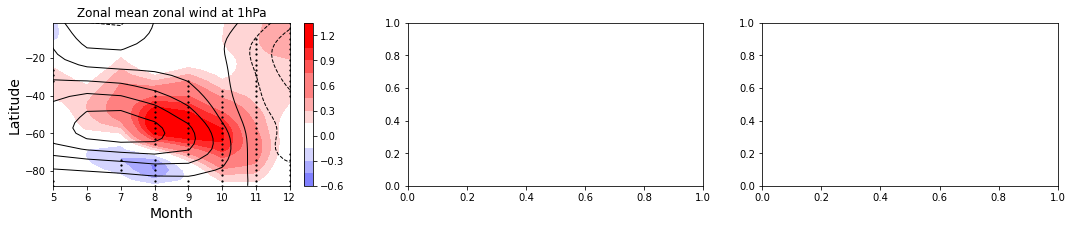

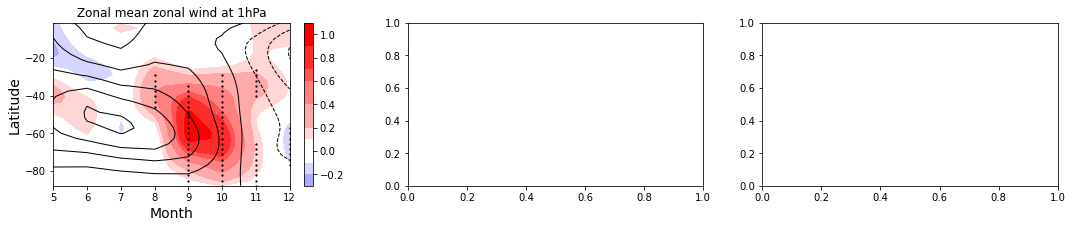

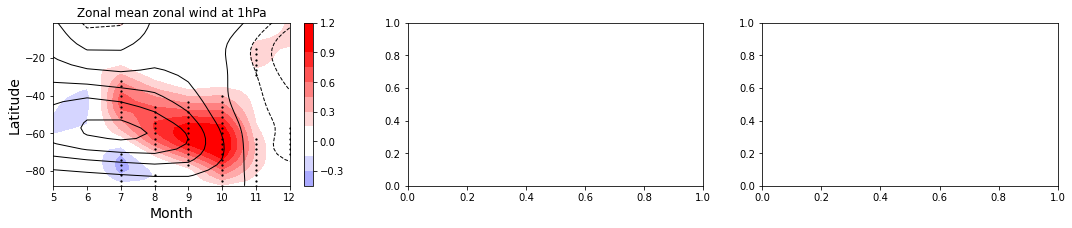

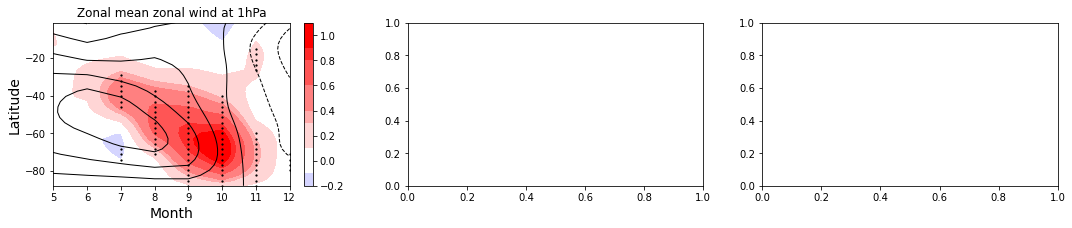

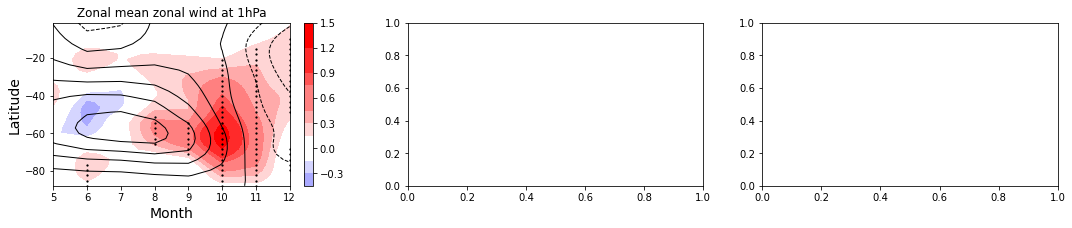

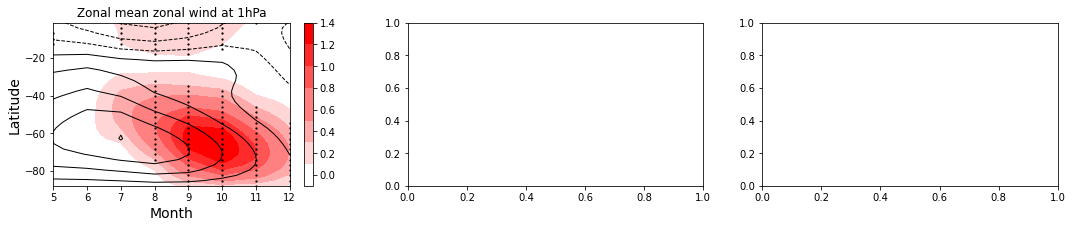

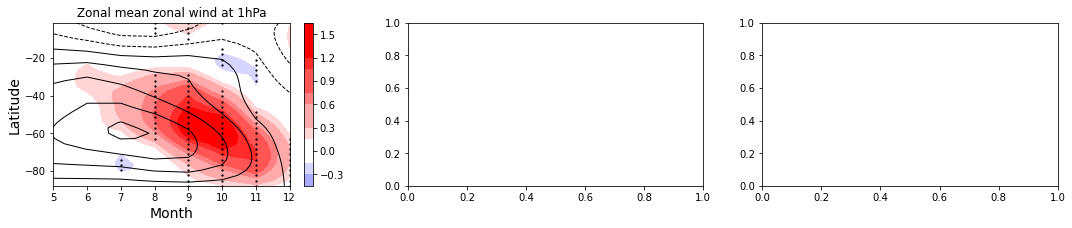

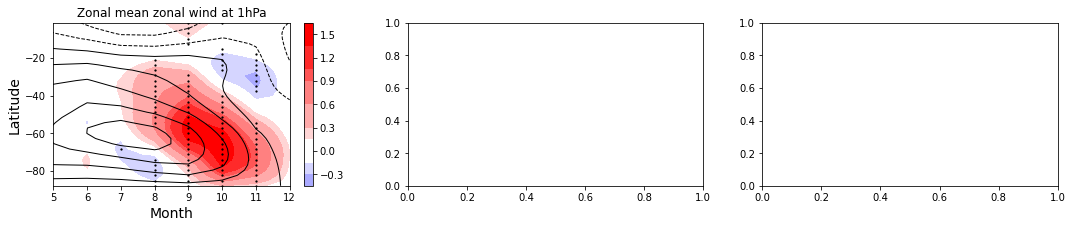

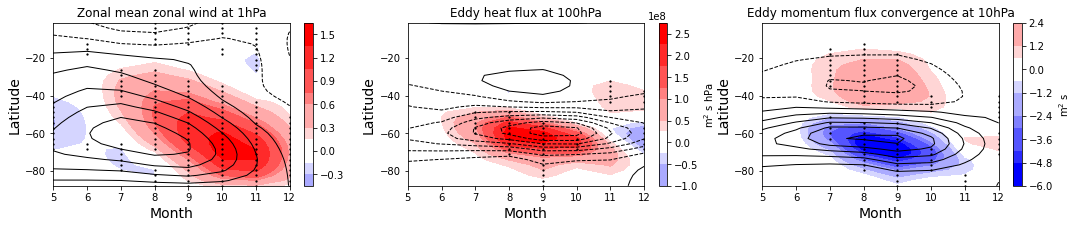

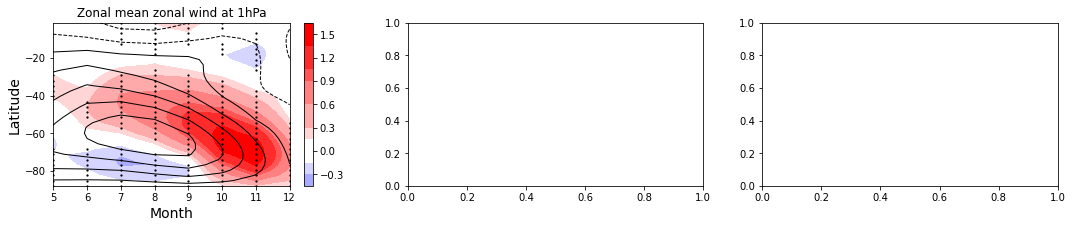

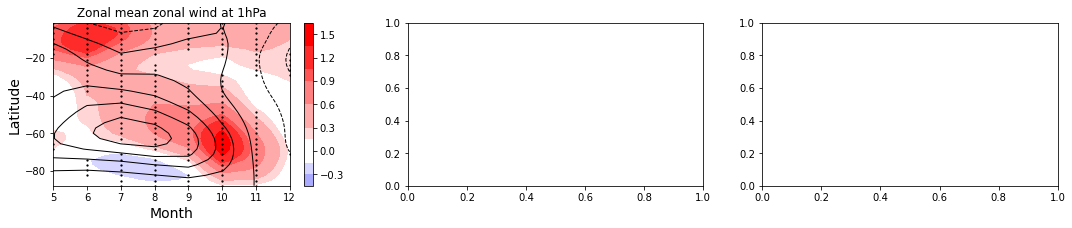

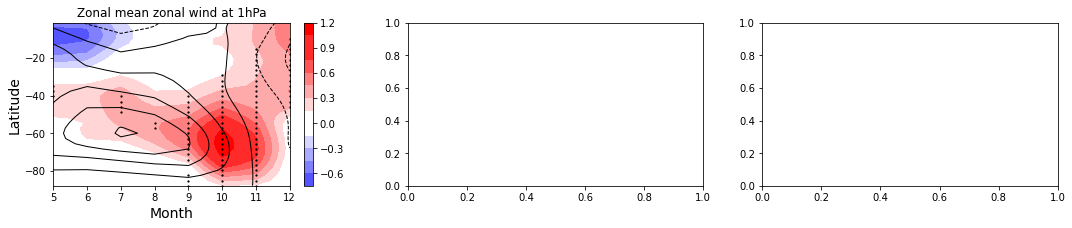

In [20]:
fig_all_zonwind, ax_all_zonwind = plt.subplots(8,8, figsize = (70,50))
ax_all_zonwind = ax_all_zonwind.flatten()

fig_all_heatflux, ax_all_heatflux = plt.subplots(8,8, figsize = (70,50))
ax_all_heatflux = ax_all_heatflux.flatten()

fig_all_momflux_div, ax_all_momflux_div = plt.subplots(8,8, figsize = (70,50))
ax_all_momflux_div = ax_all_momflux_div.flatten()


for i, (name,version, grid) in enumerate(zip(model_name_list, version_name_list, grid_name_list)):

    fig, ax  = plt.subplots(1,3, figsize = (18,3))
    ua10_datapath = basepath_ua10+basename_ua10.format(name,version, grid)

    # Plot 1hPa Zonal wind regression
    ua1_datapath = basepath_ua1+basename_ua1.format(name,version,grid)
    zonwind_reg = RegressionU1SPV(model_name = name+'_'+version, ua10_path= ua10_datapath, variable_path=ua1_datapath, plev = 100, variable_name='ua')
    plot_slope_data(zonwind_reg, ax[0], title = 'Zonal mean zonal wind at 1hPa')
    plot_slope_data(zonwind_reg, ax_all_zonwind[i])

    # Check if we have heatflux and momentumflux for this model. If yes, plot the regression as well
    heatflux_path_pattern = basepath_epflux + name + '/' + 'heat_fluxes/' + 'EP_heat_flux_day_{0}_historical_{1}_{2}_monmean.nc'.format(name, version, '*')
    file_path_list = glob.glob(heatflux_path_pattern)
    if file_path_list != []:
        heat_flux_path = file_path_list[0]
        mom_flux_div_pattern = basepath_epflux + name + '/' + 'momentum_flux_div/' + 'EP_momentum_flux_divergence_day_{0}_historical_{1}_{2}_monmean.nc'.format(name, version, '*')
        mom_flux_div_path = glob.glob(mom_flux_div_pattern)[0]

        heatflux_reg = RegressionU1SPV(model_name = name+'_'+version, ua10_path= ua10_datapath, variable_path=heat_flux_path, plev = 10000, variable_name='EPp')
        plot_slope_data(heatflux_reg, ax[1], cbar_label = r'm$^2$ s hPa', title = 'Eddy heat flux at 100hPa')
        plot_slope_data(heatflux_reg, ax_all_heatflux[i], cbar_label = r'm$^2$ s hPa')

        momfluxdiv_reg = RegressionU1SPV(model_name = name+'_'+version, ua10_path= ua10_datapath, variable_path=mom_flux_div_path, plev = 1000, variable_name='div_EPphi')

        # # Data is for divergence, but we want convergence. Change sign
        # momfluxdiv_reg._slope = - momfluxdiv_reg._slope
        plot_slope_data(momfluxdiv_reg, ax[2], cbar_label = r'm$^2$ s', title = 'Eddy momentum flux convergence at 10hPa')
        plot_slope_data(momfluxdiv_reg, ax_all_momflux_div[i], cbar_label = r'm$^2$ s')
        
    else:
        pass
    
    fig.savefig('Plots/SPV_reg_{}.pdf'.format(zonwind_reg.name), bbox_inches = 'tight')
    
fig_all_zonwind.savefig('Plots/UA1_reg_SPV_AllModels.pdf', bbox_inches = 'tight')
fig_all_heatflux.savefig('Plots/Heatflux_reg_SPV_AllModels.pdf', bbox_inches = 'tight')
fig_all_momflux_div.savefig('Plots/MomfluxConv_reg_SPV_AllModels.pdf', bbox_inches = 'tight')

In [ ]:
xr.load_dataset(heat_flux_path)

In [ ]:
import xarray as xr

In [ ]:
exclude_list = ['BCC-ESM1', 'CESM2-WACCM-FV2', 'CESM2-WACCM', 'CNRM-ESM2-1', 'HadGEM3-GC31-LL', 'MPI-ESM-1-2-HAM']

In [ ]:
basepath_epflux = '/home/users/tabu/eunpa_lim_project/EP_FLUX_DATA/'

fig_all, ax_all = plt.subplots(8,8, figsize = (70,50))
ax_all_flat = ax_all.flatten()

for i, (name, version, grid) in enumerate(zip(model_name_list, version_name_list, grid_name_list)):
    if name not in exclude_list:

        ua10_datapath = basepath_ua10+basename_ua10.format(name,version, grid)
    
        heatflux_path_pattern = basepath_epflux + name + '/' + 'heat_fluxes/' + 'EP_heat_flux_day_{0}_historical_{1}_{2}_monmean.nc'.format(name, version, '*')
    
        file_path_list = glob.glob(heatflux_path_pattern)
    
        if file_path_list != []:
            heat_flux_path = file_path_list[0]
    
            reg_test = RegressionU1SPV(model_name = name+'_'+version, ua10_path= ua10_datapath, variable_path=heat_flux_path, plev = 10000, variable_name='EPp')
            
            fig, ax  = plt.subplots()
        
            plot_slope_data(reg_test, ax)
        
            plot_slope_data(reg_test, ax_all_flat[i])
    
        else:
            pass